<a href="https://colab.research.google.com/github/liuxx479/NGphotoz/blob/master/prep_mass_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import *
from scipy.stats import norm
from scipy.stats import uniform
%matplotlib inline

In [2]:
######### goals of this notebook
## 1) compute the nubmer density per redshift bin, using the fiducial photo-z (check if used a gaussian window or step functions)
## 2) add noise as GRF to each redshift
## 3) define the bin edges
## 4) smooth the maps
## 5) compute peaks, minima, PDF, MFs, moments
## 6) turn this into a python code

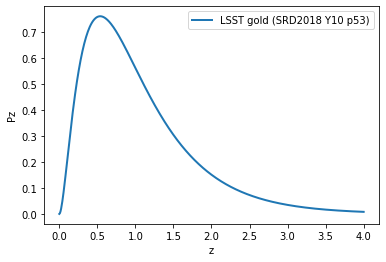

In [6]:
##### number density per redshift bins
def Pz_norm(zp_support, pz):
  return pz/np.trapz(pz, zp_support)

def Pz_norm_tomo(zp_support, pz):
  return array([Pz_norm(zp_support, ipz) for ipz in pz])

zarr=np.linspace(0,4, 501)

tomo_centers=np.arange(0.5, 3, 0.5)
tomo_widths=np.ones(5)*0.5
tomo_bins = np.array([tomo_centers, tomo_widths]).T

z0_SRD, alpha_SRD = 0.11, 0.68
Pz_SRD = lambda z: Pz_norm(z, z**2 * exp(-(z/z0_SRD)**alpha_SRD))

plot(zarr, Pz_SRD(zarr), lw=2, label='LSST gold (SRD2018 Y10 p53)')
xlabel('z')
ylabel('Pz')
legend()
show()